<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
titanic = pd.read_csv('/content/Titanic-Dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [30]:
titanic['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [32]:
Embarked_mapped = {
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
}
titanic['Embarked'] = titanic['Embarked'].replace(Embarked_mapped)
titanic['Embarked']


,Embarked
0,Southampton
1,Cherbourg
2,Southampton
3,Southampton
4,Southampton
...,...
886,Southampton
887,Southampton
888,Southampton
889,Cherbourg


Filling in missing values on Embarked column

In [33]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [34]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
titanic.drop(['Cabin'], axis=1, inplace=True)

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [35]:
titanic['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
19.00,25
28.00,25
...,...
36.50,1
55.50,1
0.92,1


In [36]:
percentage = titanic.isnull().sum()/titanic.shape[0]*100
percentage

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [14]:
titanic.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [37]:
import missingno as msno

<Axes: >

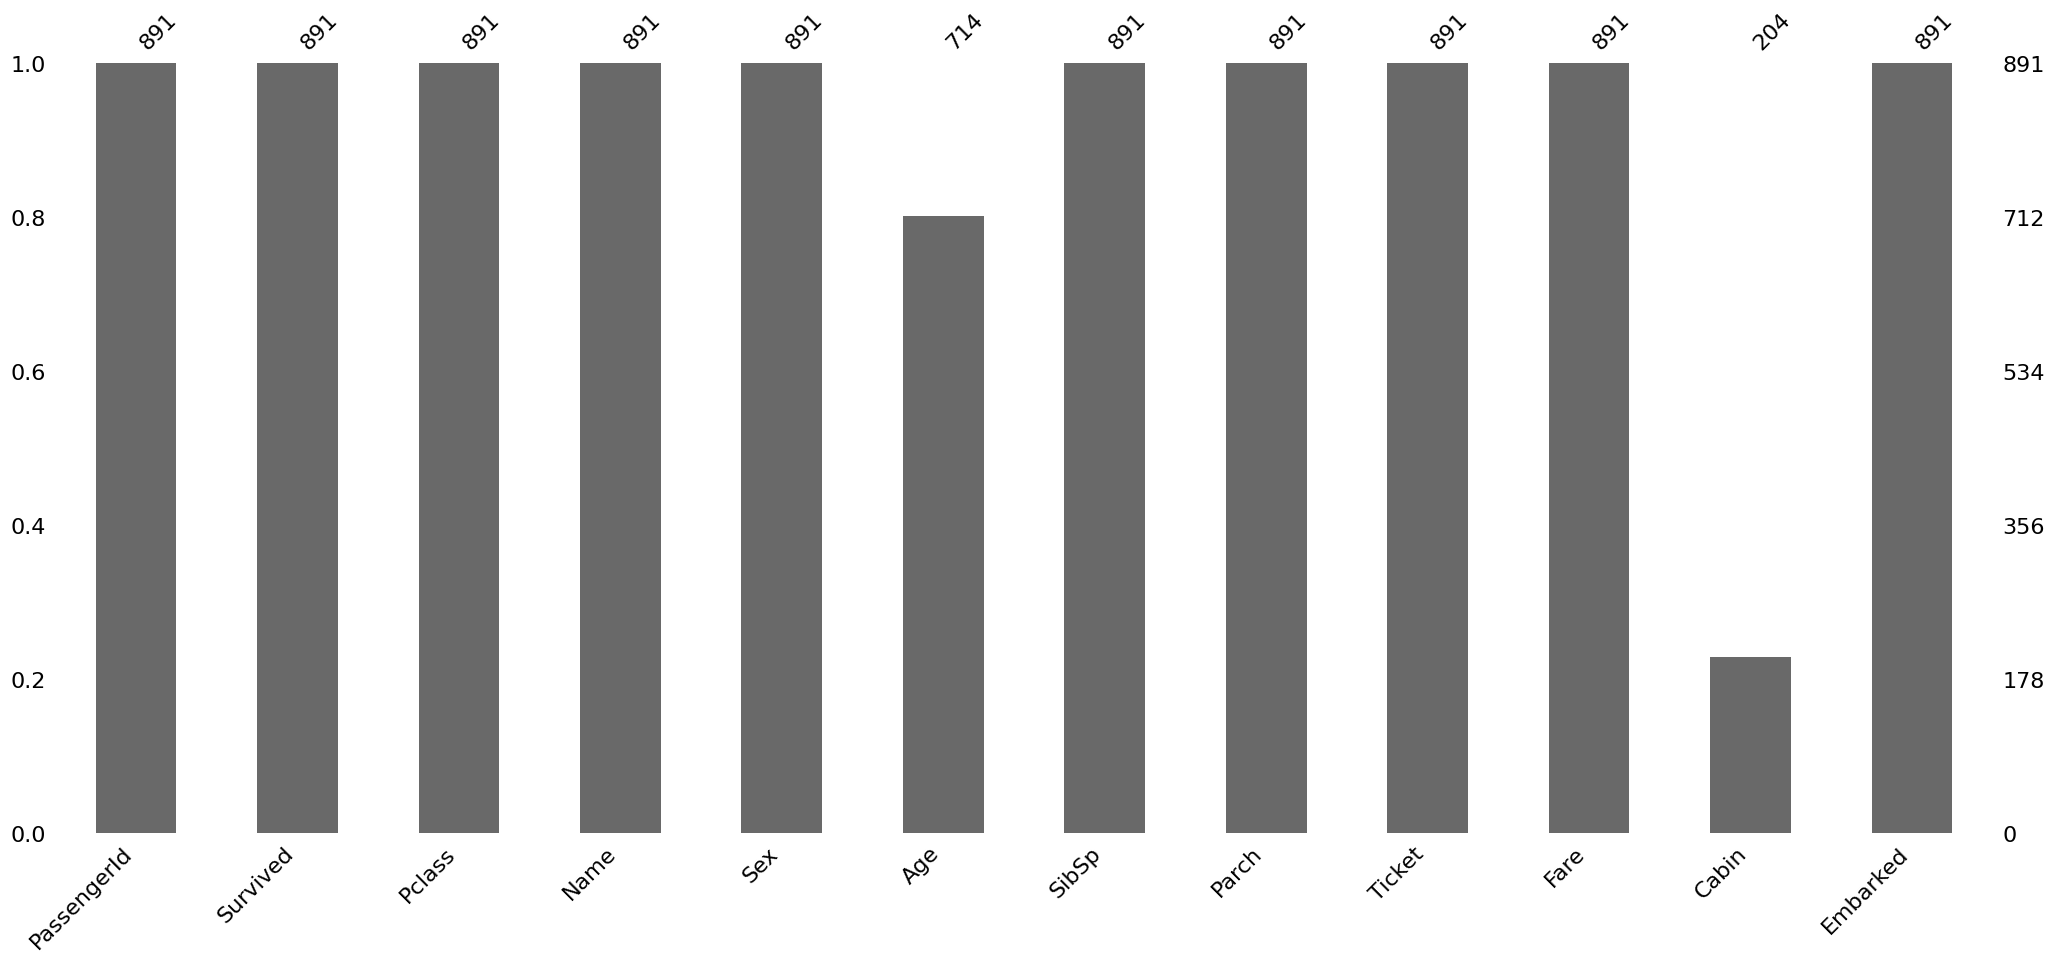

In [38]:
msno.bar(titanic)

<Axes: >

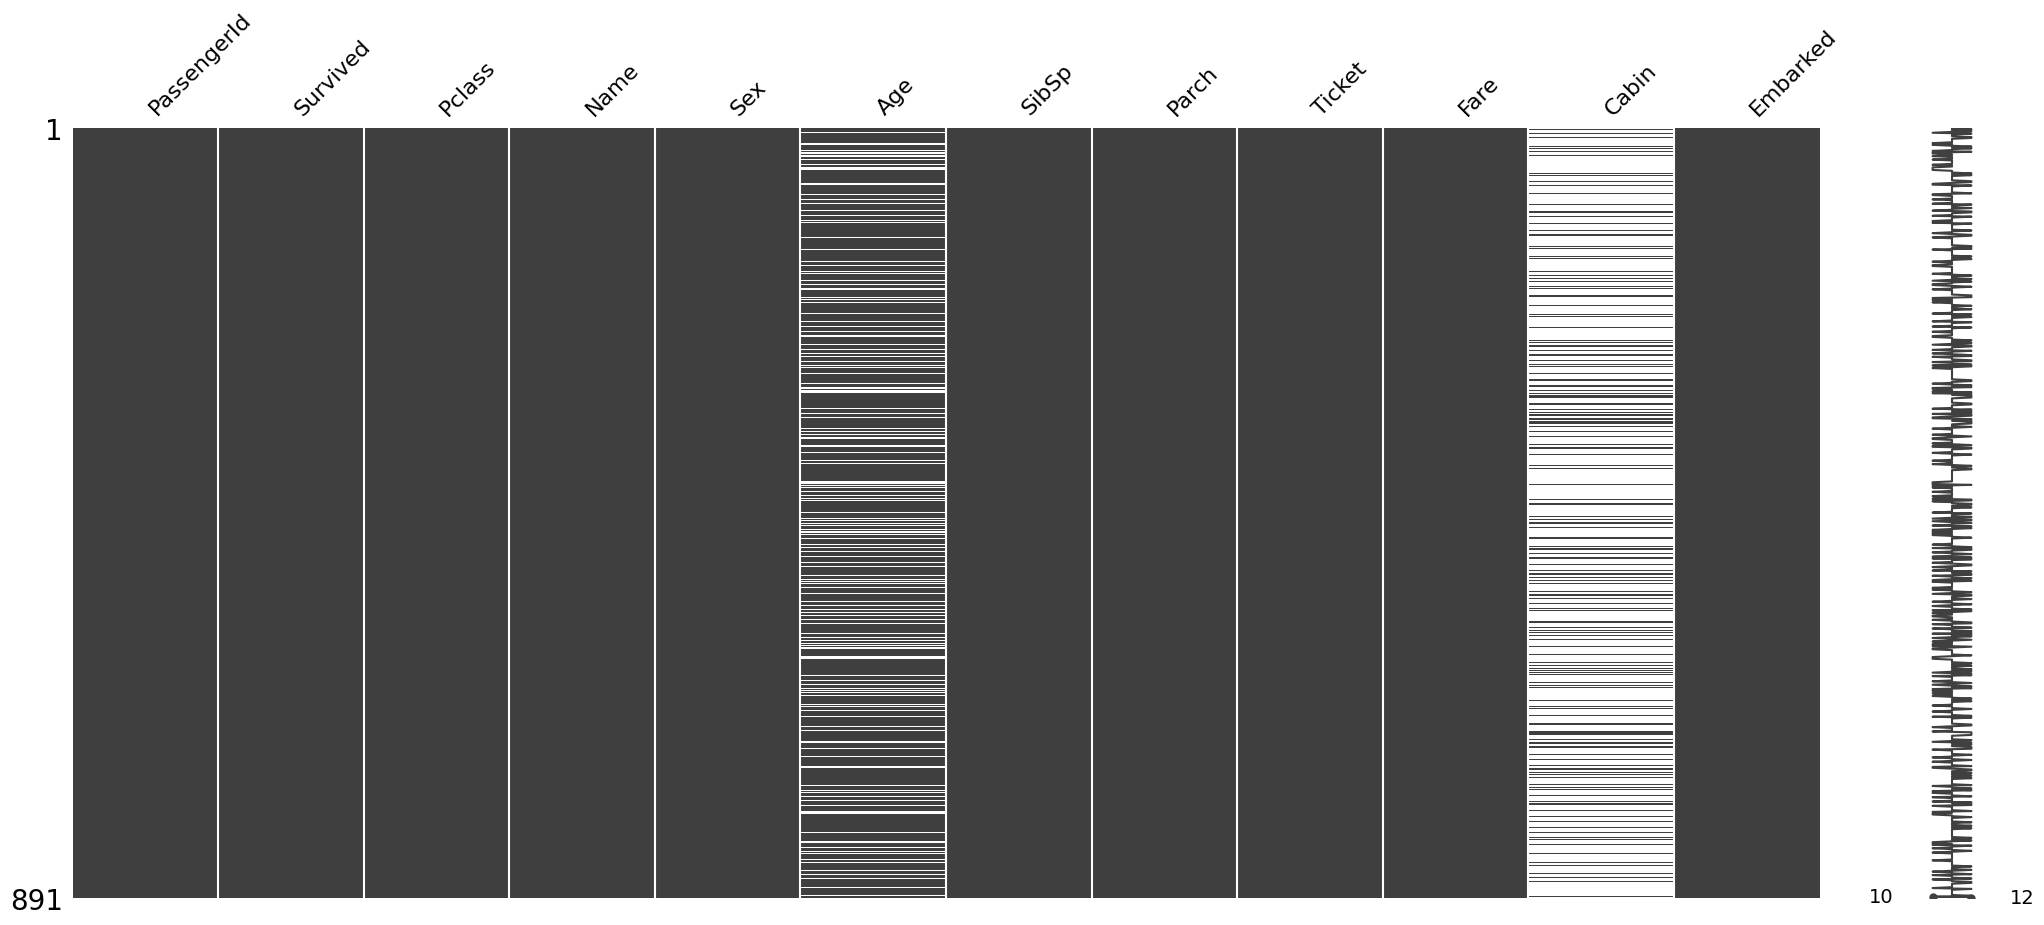

In [39]:
msno.matrix(titanic)

##Distribution of Age

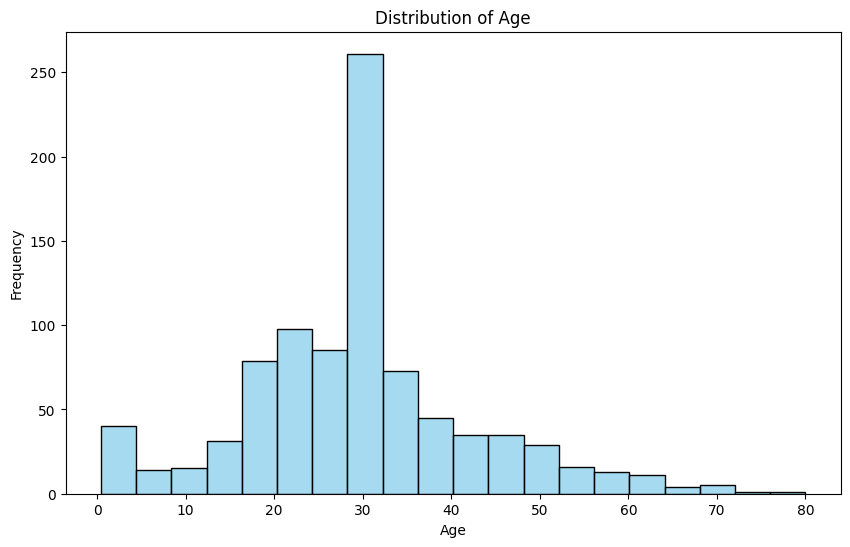

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: >

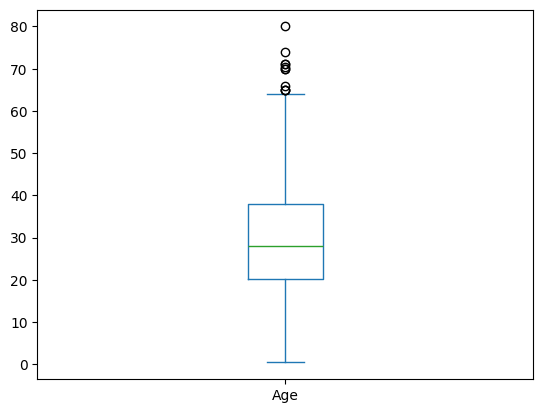

In [19]:
#Distribution of Age
titanic['Age'].plot(kind='box')

Fill in missing values using mean

In [41]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [48]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [49]:
titanic.drop(['Name'], axis=1, inplace=True)

In [53]:
titanic.drop(['PassengerId','Ticket'], axis=1, inplace=True)

In [54]:
titanic.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,89
SibSp,7
Parch,7
Fare,248
Embarked,3


In [50]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


##correlation

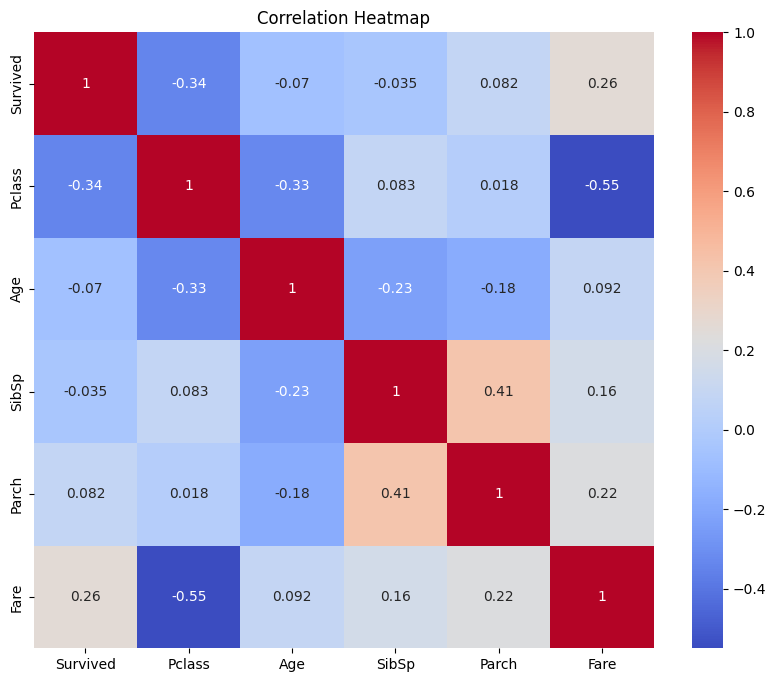

In [55]:
#Select only numeric columns for correlation
titanic_numeric = titanic.select_dtypes(include=['float64', 'int64'])

#Heatmap to show correlation
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

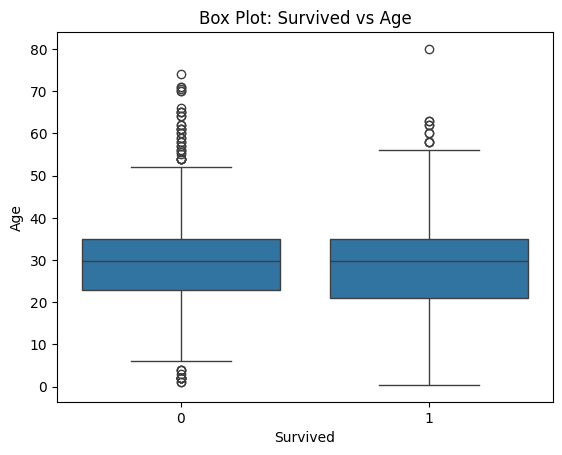

In [66]:
#Relationship between Age and those who survived
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Box Plot: Survived vs Age')
plt.show()

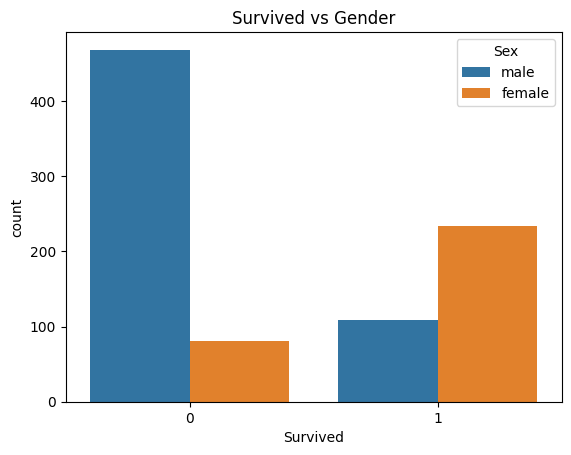

In [69]:
#Relationship between Gender and those who survived
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survived vs Gender')
plt.show()

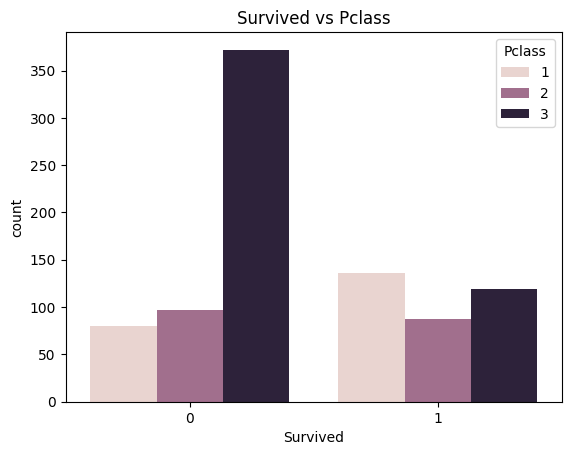

In [78]:
#Relationship between Ticket class and those who survived
#survived, 0 = NO, 1 = Yes
sns.countplot(x='Survived', hue='Pclass', data=titanic)
plt.title('Survived vs Pclass')
plt.show()

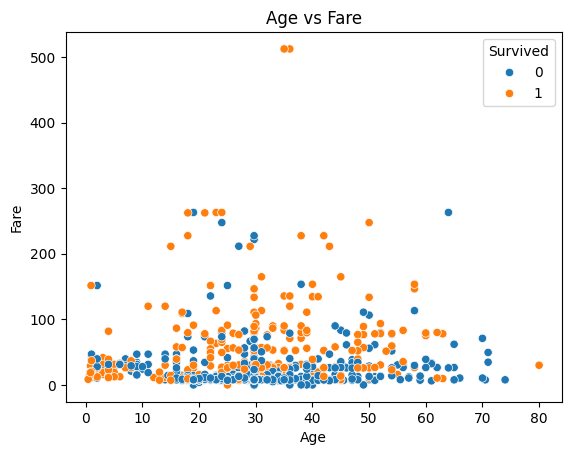

In [81]:
#Bivariate visualization
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic)
plt.title('Age vs Fare')
plt.show()

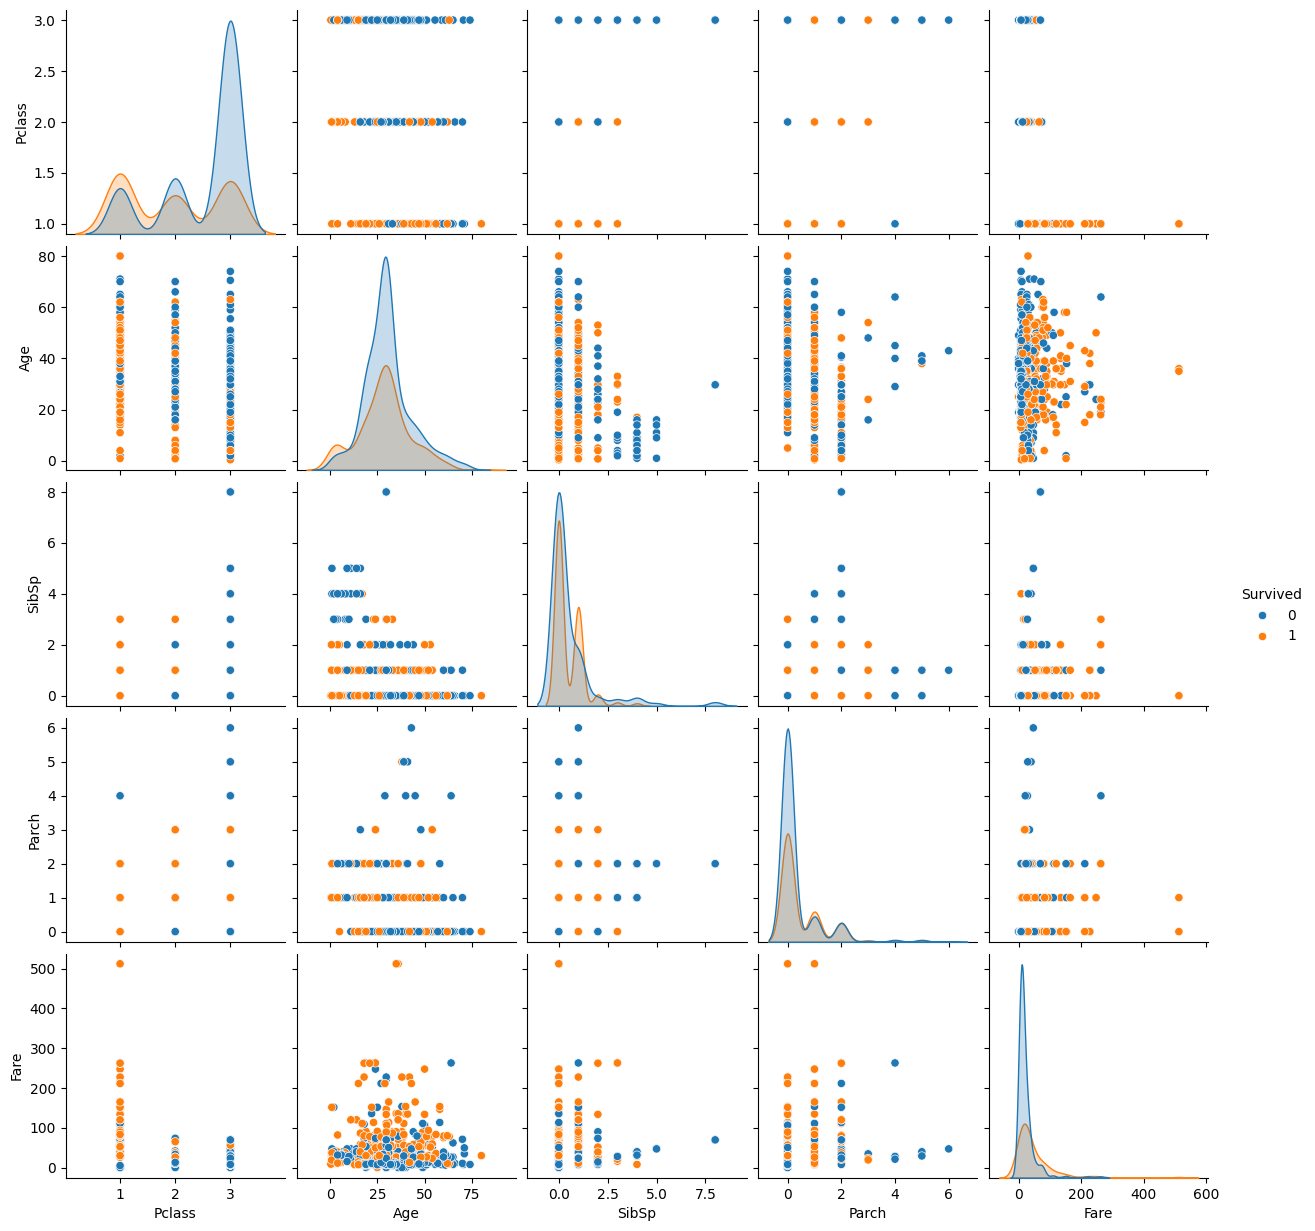

In [71]:
#Multivariate visualization
sns.pairplot(titanic, hue='Survived')
plt.show()